# TRABALHO SIB

## Secção 1

### Exploração inicial e pré-processamento
• Rever toda a documentação disponível sobre o conjunto de dados.
• Carregar o conjunto de dados e realizar uma análise exploratória do mesmo.
• Realizar os passos necessários de preparação dos dados e pré-processamento,
incluindo possivelmente a geração de atributos, a sua seleção, o tratamento de
possíveis valores em falta, etc.

Esta etapa deve corresponder à secção 1 do Notebook onde deverá:
• descrever e caracterizar os dados atribuídos de acordo com a documentação/
literatura existente;
• descrever sucintamente as características dos dados disponíveis a partir da
análise exploratória inicial;
• descrever os passos de preparação dos dados e pré-processamento que efetuou,
justificando as suas escolhas;
• incluir os gráficos exploratórios iniciais que ilustrem as principais características
dos dados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# para desenhar os gráficos dentro do notebook
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import spearmanr
%matplotlib inline


• seq_id: unique identifier of each protein variants
• protein_sequence: amino acid sequence of each protein variant. The stability (as measured by tm) of protein is determined by its protein sequence. (Please note that most of the sequences in the test data have the same length of 221 amino acids, but some of them have 220 because of amino acid deletion.)
• pH: the scale used to specify the acidity of an aqueous solution under which the stability of protein was measured. Stability of the same protein can change at different pH levels.
• data_source: source where the data was published
• tm: target column. (Higher tm means the protein variant is more stable.)

In [2]:
#read the csv file into a dataframe
df_train = pd.read_csv(r"D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\train.csv")
df_train

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [3]:
df_test = pd.read_csv(r"D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\test.csv")
df_test

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [4]:
train_updates = pd.read_csv(r'D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\train_updates_20220929.csv')

In [5]:
df_append = pd.DataFrame()
df_append = df_append.append(df_test, ignore_index=True)
df_append = df_append.append(df_train, ignore_index=True)
df_append

C:\Users\maryg\AppData\Local\Temp\ipykernel_15308\1147155682.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_test, ignore_index=True)
C:\Users\maryg\AppData\Local\Temp\ipykernel_15308\1147155682.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_train, ignore_index=True)


,seq_id,protein_sequence,pH,data_source,tm
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8.0,Novozymes,NaN
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
...,...,...,...,...,...
33798,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
33799,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
33800,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
33801,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [6]:
data=df_append

In [7]:
data.shape

(33803, 5)

Fazer drop dos valores dos indices que estavam no update

In [8]:
for seq_id in train_updates.seq_id:
    data = data.drop(index = seq_id)

In [9]:
data.shape

(31369, 5)

In [10]:
data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8.0,Novozymes,NaN
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,Novozymes,NaN


In [11]:
### Sumario dos dados

In [12]:
data.describe()

,seq_id,pH,tm
count,31369.000000,31093.000000,29027.000000
mean,17151.875418,6.972951,49.099583
std,9913.215994,1.612990,13.967426
min,0.000000,1.990000,-1.000000
25%,8317.000000,7.000000,42.100000
50%,17631.000000,7.000000,48.000000
75%,25823.000000,7.000000,53.800000
max,33802.000000,64.900000,130.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31369 entries, 0 to 33802
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31369 non-null  int64  
 1   protein_sequence  31369 non-null  object 
 2   pH                31093 non-null  float64
 3   data_source       28251 non-null  object 
 4   tm                29027 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4+ MB


In [14]:
data.isnull().sum()

seq_id                 0
protein_sequence       0
pH                   276
data_source         3118
tm                  2342
dtype: int64

In [15]:
data.shape

(31369, 5)

In [16]:
data.columns

Index(['seq_id', 'protein_sequence', 'pH', 'data_source', 'tm'], dtype='object')

In [17]:
data=data[data['pH']<14]

data.shape

### Visualização dos dados

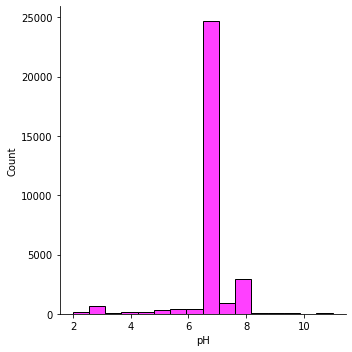

In [19]:
sns.displot(data=data,x='pH', color="magenta")
plt.xlabel("pH")
plt.show()

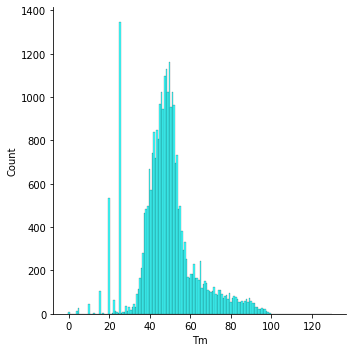

In [20]:
sns.displot(data=data,x='tm', color="cyan")
plt.xlabel("Tm")
plt.show()

In [21]:
aminos = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for letter in aminos:
    df_train[letter] = df_train.protein_sequence.str.count(letter)
    df_test[letter] = df_test.protein_sequence.str.count(letter)

In [22]:
df_train=df_train.dropna()

In [58]:
df_train.shape

(27769, 25)

## Análise não supervisionada

• Usar as técnicas de redução de dimensionalidade adequadas aos seus dados;
• Usar as técnicas de visualização de dados multivariadas adequadas aos seus
dados;
• Aplicar métodos de clustering que considere adequados aos seus dados.

## PCA

In [24]:
df = df_train[['tm', 'pH','A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']].copy()
df=df.dropna()
df

,tm,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,75.7,7.0,45,1,13,30,13,38,3,14,...,8,5,18,6,25,11,14,37,4,3
1,50.5,7.0,28,0,10,52,6,18,4,13,...,2,6,8,22,30,14,12,13,3,3
2,40.5,7.0,50,9,27,32,21,65,11,16,...,6,15,20,25,31,33,30,30,3,16
3,47.2,7.0,20,5,19,29,12,16,7,10,...,2,9,16,9,10,16,19,14,3,4
4,49.5,7.0,86,14,78,78,32,84,40,71,...,31,65,128,54,63,148,120,124,16,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,51.8,7.0,33,12,38,31,18,51,15,21,...,13,24,25,24,42,33,18,42,13,18
31386,37.2,7.0,37,5,21,29,22,27,22,30,...,14,19,19,16,25,37,26,34,5,14
31387,64.6,7.0,13,1,7,7,7,11,2,6,...,7,5,6,8,3,10,6,7,4,4
31388,50.7,7.0,47,5,34,36,23,52,11,34,...,26,25,31,12,25,51,32,48,3,18


In [25]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
data_scaled= preprocessing.scale(df)
n=2
pca = PCA(n_components=n)
pca.fit(data_scaled)
x_reduced = pca.transform(data_scaled)

print (pca.explained_variance_ratio_)
print('Shape before PCA: ', data_scaled.shape)
print('Shape after PCA: ', x_reduced.shape)

[0.71167164 0.0492993 ]
Shape before PCA:  (27769, 22)
Shape after PCA:  (27769, 2)


import plotly.express as px
fig = px.scatter(x_reduced, x=0, y=1)
fig.show()

# Métodos de clustering


## K-Means Clustering
K-Means clustering is the most popular unsupervised machine learning algorithm and is used to find intrinsic groups within the unlabelled dataset and draw inferences from them.

#### Declare feature vector and target variable

In [26]:
X = df

y = df['pH']
y

0        7.0
1        7.0
2        7.0
3        7.0
4        7.0
        ... 
31385    7.0
31386    7.0
31387    7.0
31388    7.0
31389    7.0
Name: pH, Length: 27769, dtype: float64

#### Convert categorical variable into integers

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['pH'] = le.fit_transform(X['pH'])

y = le.transform(y)

#### View the summary of X

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27769 entries, 0 to 31389
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tm      27769 non-null  float64
 1   pH      27769 non-null  int64  
 2   A       27769 non-null  int64  
 3   C       27769 non-null  int64  
 4   D       27769 non-null  int64  
 5   E       27769 non-null  int64  
 6   F       27769 non-null  int64  
 7   G       27769 non-null  int64  
 8   H       27769 non-null  int64  
 9   I       27769 non-null  int64  
 10  K       27769 non-null  int64  
 11  L       27769 non-null  int64  
 12  M       27769 non-null  int64  
 13  N       27769 non-null  int64  
 14  P       27769 non-null  int64  
 15  Q       27769 non-null  int64  
 16  R       27769 non-null  int64  
 17  S       27769 non-null  int64  
 18  T       27769 non-null  int64  
 19  V       27769 non-null  int64  
 20  W       27769 non-null  int64  
 21  Y       27769 non-null  int64  
dty

#### Preview the dataset X

In [29]:
X.head()

,tm,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,75.7,66,45,1,13,30,13,38,3,14,...,8,5,18,6,25,11,14,37,4,3
1,50.5,66,28,0,10,52,6,18,4,13,...,2,6,8,22,30,14,12,13,3,3
2,40.5,66,50,9,27,32,21,65,11,16,...,6,15,20,25,31,33,30,30,3,16
3,47.2,66,20,5,19,29,12,16,7,10,...,2,9,16,9,10,16,19,14,3,4
4,49.5,66,86,14,78,78,32,84,40,71,...,31,65,128,54,63,148,120,124,16,47


#### Feature Scaling

In [30]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,tm,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,0.582308,0.741573,0.049505,0.002755,0.015458,0.030151,0.057269,0.065858,0.009740,0.030303,...,0.037559,0.011494,0.023316,0.007762,0.055310,0.014267,0.021341,0.066787,0.030534,0.015075
1,0.388462,0.741573,0.030803,0.000000,0.011891,0.052261,0.026432,0.031196,0.012987,0.028139,...,0.009390,0.013793,0.010363,0.028461,0.066372,0.018158,0.018293,0.023466,0.022901,0.015075
2,0.311538,0.741573,0.055006,0.024793,0.032105,0.032161,0.092511,0.112652,0.035714,0.034632,...,0.028169,0.034483,0.025907,0.032342,0.068584,0.042802,0.045732,0.054152,0.022901,0.080402
3,0.363077,0.741573,0.022002,0.013774,0.022592,0.029146,0.052863,0.027730,0.022727,0.021645,...,0.009390,0.020690,0.020725,0.011643,0.022124,0.020752,0.028963,0.025271,0.022901,0.020101
4,0.380769,0.741573,0.094609,0.038567,0.092747,0.078392,0.140969,0.145581,0.129870,0.153680,...,0.145540,0.149425,0.165803,0.069858,0.139381,0.191958,0.182927,0.223827,0.122137,0.236181


#### K-Means model with two clusters

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

#### K-Means model parameters study

In [55]:
kmeans.cluster_centers_


array([[0.36489812, 0.74254354, 0.02748943, 0.0133407 , 0.02160517,
        0.02294948, 0.05576305, 0.0388803 , 0.02406437, 0.03874267,
        0.02785927, 0.02601432, 0.0367042 , 0.03139333, 0.0203235 ,
        0.01796567, 0.03663871, 0.02925508, 0.02616892, 0.03881851,
        0.02811105, 0.0486187 ],
       [0.35987741, 0.72843458, 0.19982118, 0.12154138, 0.16488623,
        0.19339727, 0.36309388, 0.24846196, 0.19915145, 0.25456615,
        0.19934758, 0.21225938, 0.25294129, 0.23690525, 0.17457631,
        0.17630126, 0.29533195, 0.273252  , 0.21094889, 0.27476376,
        0.19334874, 0.3119582 ],
       [0.361031  , 0.74181672, 0.07033373, 0.03756539, 0.06026184,
        0.06616561, 0.14850123, 0.09604708, 0.06819398, 0.09995331,
        0.07511644, 0.07386727, 0.09658569, 0.09029017, 0.06144396,
        0.05377901, 0.10668192, 0.09242012, 0.07323084, 0.10106951,
        0.07272678, 0.12866184],
       [0.3855617 , 0.19911082, 0.01574661, 0.01092019, 0.00962369,
        0.0066201

### Inertia

• Inertia is not a normalized metric.

• The lower values of inertia are better and zero is optimal.

• But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

• Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

• We can calculate model inertia as follows:-

In [57]:
kmeans.inertia_

572.8605625447368

• The lesser the model inertia, the better the model fit.

• We can see that the model has very high inertia. So, this is not a good model fit to the data.

Our model has a very high inertia of    . So this is not we conclude is not a good fit to the data

#### Check quality of weak classification by the model

In [34]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 95 out of 27769 samples were correctly labeled.


In [35]:
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.0034


We have achieved a weak classification accuracy of 0,3 % by our unsupervised model.

#### The Elbow Method

The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.

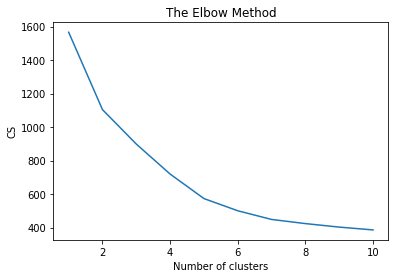

In [36]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

•  By the above plot, we can see that there is a kink at k=2 and k=5.

•  Hence k=2 can be considered a good number of the cluster to cluster this data.

•  But, we have seen that I have achieved a weak classification accuracy of 1% with k=2.

We achieved a weak classification accuracy of 0,3% with k=2 by our unsupervised model. So, we changed the value of k in order to find a higher classification accuracy.

In [37]:
# mudei o valor de k para 2 e na linha baixo para k=5, porque é onde nos dão os picos. No site fizeram assim, vamos experimentar se está bem
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Result: 95 out of 27769 samples were correctly labeled.
Accuracy score: 0.0034


In [38]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Result: 5 out of 27769 samples were correctly labeled.
Accuracy score: 0.0002


By changing the value of K, we achieved a higher classification accuracy of    with k=   . We conclude that k= is the optimal number of clusters.

## Aprendizagem máquina
• Comparar o comportamento de diversos modelos/ algoritmos de Aprendizagem Máquina no conjunto de dados. Deverá analisar o comportamento dos algoritmos calculando métricas de erro apropriadas e usando métodos de estimação do erro adequado. Deverá ainda apresentar o melhor modelo a que consiga chegar para os dados disponíveis, usando todos os exemplos, interpretando-o quando tal for possível.

In [39]:
X = df_train.drop(columns = ['tm','protein_sequence','data_source'])
y = df_train['tm']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 11)

In [41]:
# parameters tuned separately
model1 = xgb.XGBRegressor(n_estimators = 170, max_depth = 5)
model1.fit(X_train, y_train)
predictions1 = model1.predict(X_test)

In [42]:
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

Mean Absolute Error = 5.80


In [43]:
score = model1.score(X_train, y_train)
print("Training score: ", score)

Training score:  0.7793066662595163


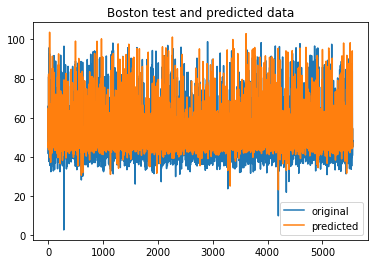

In [44]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions1, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
pecc_knn = cross_val_score(knn_model, X_train, y_train, cv = 5).mean()
pecc_knn

0.18193456223286397

In [46]:
model_KNR = KNeighborsRegressor()
model_KNR.fit(X_train, y_train)
predictions1 = model_KNR.predict(X_test)
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

Mean Absolute Error = 7.53


In [48]:
from sklearn import svm

model_svm = svm_model = svm.SVR()
model_svm.fit(X_train, y_train)
predictions1 = model_svm.predict(X_test)
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

Mean Absolute Error = 8.21


In [49]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)
predictions1 = model_rfr.predict(X_test)
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

Mean Absolute Error = 5.60


In [50]:
from sklearn.ensemble import AdaBoostRegressor
model_AB = AdaBoostRegressor()
model_AB.fit(X_train, y_train)
predictions1 = model_AB.predict(X_test)
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

Mean Absolute Error = 10.52


In [51]:
score = model_rfr.score(X_train, y_train)
print("Training score: ", score)

Training score:  0.9423304294346556


In [52]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
predictions_LR = model_LR.predict(X_test)
mse=mean_absolute_error(y_test, predictions_LR)
print('Mean Absolute Error = %.2f' %mse)

Mean Absolute Error = 8.31


In [53]:
score = model_LR.score(X_train, y_train)
print("Training score: ", score)

Training score:  0.15853621603768497
